## Domain – SEA Transportation
## focus – forecast demand

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading data from file into dataframe

df=pd.read_csv(r"./datasets/SeaPlaneTravel.csv")

In [3]:
df

,Month,#Passengers
0,2003-01,112
1,2003-02,118
2,2003-03,132
3,2003-04,129
4,2003-05,121
...,...,...
139,2015-08,606
140,2015-09,508
141,2015-10,461
142,2015-11,390


In [4]:
df.rename(columns={"#Passengers":'Count'},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   144 non-null    object
 1   Count   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


### Converting Month to date columns

In [6]:
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   144 non-null    datetime64[ns]
 1   Count   144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
df = df.set_index('Month')

In [9]:
df.head()

,Count
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


In [10]:
df.tail()

,Count
Month,
2015-08-01,606
2015-09-01,508
2015-10-01,461
2015-11-01,390
2015-12-01,432


In [11]:
ts = df['Count']

In [12]:
ts.head(5)

Month
2003-01-01    112
2003-02-01    118
2003-03-01    132
2003-04-01    129
2003-05-01    121
Name: Count, dtype: int64

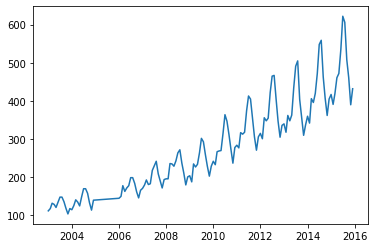

In [13]:
## Plotting the graph of time vs passangers
plt.plot(ts)
plt.show()

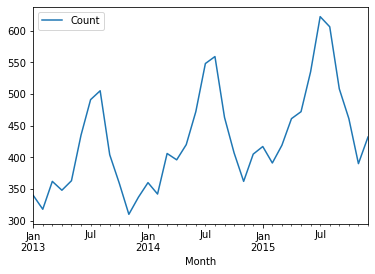

In [14]:
# let's check 3 year of data. 
df.loc['2013-01-01':'2015-12-01'].plot()
plt.show()

In [15]:
# import a statsmodels API to find the properties of TSA
from statsmodels.tsa.seasonal import seasonal_decompose

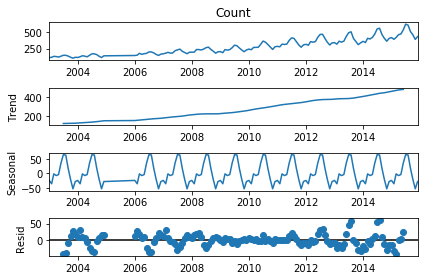

In [17]:
# let's break the TS
decomposition = seasonal_decompose(df['Count'], period=12)
decomposition.plot();

In [19]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['Count'])

(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [20]:
# let's create a function to properly print and understand the output of ADF test
def adf_check(time_series):
  result = adfuller(time_series) 
  print("Augmented Dickey Fuller Test")
  print("******************************")
  labels = ['ADF Test Statistic','p-value','#lags', 'No. of Obs.']
  for value, label in zip(result, labels): 
    print(label + " : " + str(value))
  if result[1] <= 0.05:
    print("Time series is Stationary.")
  else:
    print("Time series is Non-Stationary.")

In [21]:
# run the function. 
adf_check(df['Count'])

Augmented Dickey Fuller Test
******************************
ADF Test Statistic : 0.8153688792060472
p-value : 0.991880243437641
#lags : 13
No. of Obs. : 130
Time series is Non-Stationary.


In [22]:
# Differencing - First Time
df['Count_Diff'] = df['Count'] - df['Count'].shift(1)

In [23]:
# perform ADF test again. 
adf_check(df['Count_Diff'].dropna())

Augmented Dickey Fuller Test
******************************
ADF Test Statistic : -2.8292668241700056
p-value : 0.054213290283824704
#lags : 12
No. of Obs. : 130
Time series is Non-Stationary.


In [24]:
# Differencing - 2nd Time
df['Count_SecondDiff'] = df['Count_Diff'] - df['Count_Diff'].shift(1)

In [25]:
# perform ADF test again. 
adf_check(df['Count_SecondDiff'].dropna())

Augmented Dickey Fuller Test
******************************
ADF Test Statistic : -16.384231542468495
p-value : 2.7328918500143186e-29
#lags : 11
No. of Obs. : 130
Time series is Stationary.


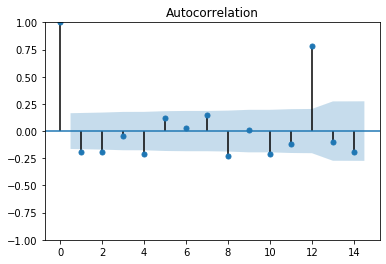

In [26]:
## perform ACF
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(df['Count_SecondDiff'].dropna(), lags=14);

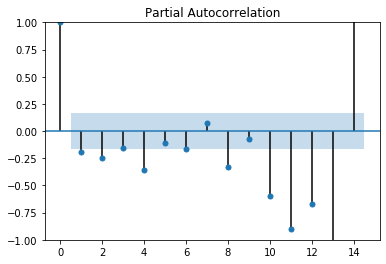

In [27]:
## Perform PACF
from statsmodels.graphics.tsaplots import plot_pacf 
plot_pacf(df['Count_SecondDiff'].dropna(), lags=14);

In [28]:
## Building ARIMA FORECASTING
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm

In [29]:
model = sm.tsa.statespace.SARIMAX(df['Count'], order=(0,2,0), seasonal_order=(1,2,1,12)) 
results = model.fit() 
print(results.summary())

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                Count   No. Observations:                  144
Model:             SARIMAX(0, 2, 0)x(1, 2, [1], 12)   Log Likelihood                -536.009
Date:                              Tue, 21 Dec 2021   AIC                           1078.018
Time:                                      21:45:07   BIC                           1086.330
Sample:                                           0   HQIC                          1081.393
                                              - 144                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1960      0.139     -1.413      0.158      -0.468       0.076
ma.S.L12      -0.99

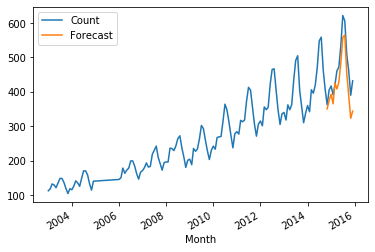

In [30]:
##Bulding Forcasting data
df['Forecast'] = results.predict(start=130, end=143, dynamic=True)
df[['Count', 'Forecast']].plot();

In [31]:
df.tail(15)

,Count,Count_Diff,Count_SecondDiff,Forecast
Month,,,,
2014-10-01,407,-56.0,40.0,NaN
2014-11-01,362,-45.0,11.0,350.235546
2014-12-01,405,43.0,88.0,374.936440
2015-01-01,417,12.0,-31.0,392.491020
2015-02-01,391,-26.0,-38.0,365.063288
2015-03-01,419,28.0,54.0,425.406471
2015-04-01,461,42.0,14.0,408.242351
2015-05-01,472,11.0,-31.0,428.798696
2015-06-01,535,63.0,52.0,484.126033


In [32]:
df.shape

(144, 4)

In [33]:
# create some future values and do the forecasting. 
from pandas.tseries.offsets import DateOffset

In [108]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]
future_dates

[Timestamp('2015-12-01 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-02-01 00:00:00'),
 Timestamp('2016-03-01 00:00:00'),
 Timestamp('2016-04-01 00:00:00'),
 Timestamp('2016-05-01 00:00:00'),
 Timestamp('2016-06-01 00:00:00'),
 Timestamp('2016-07-01 00:00:00'),
 Timestamp('2016-08-01 00:00:00'),
 Timestamp('2016-09-01 00:00:00'),
 Timestamp('2016-10-01 00:00:00'),
 Timestamp('2016-11-01 00:00:00'),
 Timestamp('2016-12-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-02-01 00:00:00'),
 Timestamp('2017-03-01 00:00:00'),
 Timestamp('2017-04-01 00:00:00'),
 Timestamp('2017-05-01 00:00:00'),
 Timestamp('2017-06-01 00:00:00'),
 Timestamp('2017-07-01 00:00:00'),
 Timestamp('2017-08-01 00:00:00'),
 Timestamp('2017-09-01 00:00:00'),
 Timestamp('2017-10-01 00:00:00'),
 Timestamp('2017-11-01 00:00:00')]

In [109]:
# let's add the new dates in the data
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)
future_dates_df

,Count,Count_Diff,Count_SecondDiff,Forecast
2016-01-01,NaN,NaN,NaN,NaN
2016-02-01,NaN,NaN,NaN,NaN
2016-03-01,NaN,NaN,NaN,NaN
2016-04-01,NaN,NaN,NaN,NaN
2016-05-01,NaN,NaN,NaN,NaN
2016-06-01,NaN,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN,NaN
2016-08-01,NaN,NaN,NaN,NaN
2016-09-01,NaN,NaN,NaN,NaN
2016-10-01,NaN,NaN,NaN,NaN


In [110]:
# concatenate the new dataframe with the previous one
future_df = pd.concat([df, future_dates_df])
future_df.tail(30)

,Count,Count_Diff,Count_SecondDiff,Forecast
2015-06-01,535,63.0,52.0,484.126033
2015-07-01,622,87.0,24.0,557.934880
2015-08-01,606,-16.0,-103.0,565.449634
2015-09-01,508,-98.0,-82.0,452.487367
2015-10-01,461,-47.0,51.0,388.711226
2015-11-01,390,-71.0,-24.0,323.048104
2015-12-01,432,42.0,113.0,343.832481
2016-01-01,NaN,NaN,NaN,NaN
2016-02-01,NaN,NaN,NaN,NaN
2016-03-01,NaN,NaN,NaN,NaN


In [111]:
future_df.shape

(167, 4)

## Predicting the passanger count for future dates

In [113]:
pred_dynamic = results.get_prediction(start=144, end=166,
                                               dynamic=True, full_results=True)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [144]:
pred2 = round(pred_dynamic.predicted_mean,2)
print(pred2)

144    447.19
145    417.59
146    453.22
147    487.53
148    501.84
149    566.16
150    657.31
151    643.66
152    534.81
153    481.03
154    407.76
155    451.26
156    466.01
157    431.11
158    464.98
159    502.47
160    516.06
161    582.75
162    678.55
163    660.67
164    541.87
165    483.56
166    402.54
Name: predicted_mean, dtype: float64


In [141]:
## Adding the predictions into dataframe
for idx in pred2.index.to_list():
    future_df.loc[future_df.iloc[[idx]].index,"Forecast"] = pred2[idx]
    

In [145]:
## Verifying the predictions
future_df.tail(30)

,Count,Count_Diff,Count_SecondDiff,Forecast
2015-06-01,535,63.0,52.0,484.126033
2015-07-01,622,87.0,24.0,557.934880
2015-08-01,606,-16.0,-103.0,565.449634
2015-09-01,508,-98.0,-82.0,452.487367
2015-10-01,461,-47.0,51.0,388.711226
2015-11-01,390,-71.0,-24.0,323.048104
2015-12-01,432,42.0,113.0,343.832481
2016-01-01,NaN,NaN,NaN,447.190000
2016-02-01,NaN,NaN,NaN,417.590000
2016-03-01,NaN,NaN,NaN,453.220000


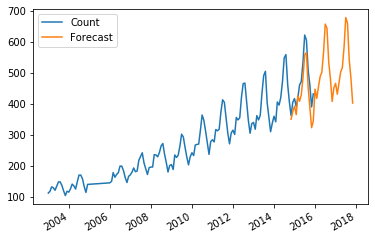

In [143]:
## Visualising the graph of predictions
future_df[['Count', 'Forecast']].plot();
plt.show()